In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [7]:
df.tail()

,Height,Weight
10,1.73,66.28
11,1.75,68.10
12,1.78,69.92
13,1.80,72.19
14,1.83,74.46


In [ ]:
# Height -> independent
# Weight -> dependent

In [22]:
X = df.iloc[:,:-1] # :->represents the whole row; :-1 -> represnts removing one column from ending
y = df.iloc[:,-1] # : ->represents thw whole row; -1 -> represnts the last column


In [12]:
X

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57
5,1.60
6,1.63
7,1.65
8,1.68
9,1.70


In [23]:
y

,Weight
0,52.21
1,53.12
2,54.48
3,55.84
4,57.20
5,58.57
6,59.93
7,61.29
8,63.11
9,64.47


In [28]:
import sklearn # purely used for machine learning

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
len(X_train) , len(y_train)

(10, 10)

In [37]:
len(X_test) , len(y_test)

(5, 5)

In [39]:
training_data  = pd.DataFrame()
training_data['X_train'] = X_train
training_data['y_train'] = y_train
training_data

,X_train,y_train
8,1.68,63.11
2,1.52,54.48
1,1.50,53.12
14,1.83,74.46
4,1.57,57.20
7,1.65,61.29
10,1.73,66.28
12,1.78,69.92
3,1.55,55.84
6,1.63,59.93


In [40]:
testing_data = pd.DataFrame()
testing_data['X_test'] = X_test
testing_data['y_test'] = y_test
testing_data

,X_test,y_test
9,1.70,64.47
11,1.75,68.10
0,1.47,52.21
13,1.80,72.19
5,1.60,58.57


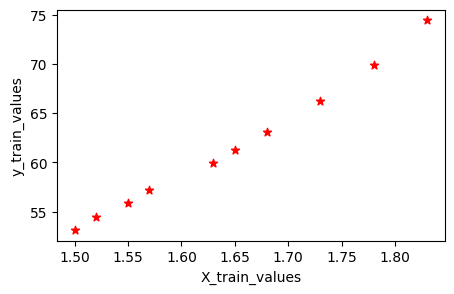

In [56]:
# data visualisation
plt.figure(figsize=(5,3))
plt.xlabel('X_train_values')
plt.ylabel('y_train_values')
plt.scatter(x=X_train,y=y_train,color='r',marker='*')
plt.show()


In [42]:
# since the data is raedy => we are going to guve the data to the algo
# aldo -> y = mx+c

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
reg = LinearRegression() # y = mx + c is used in background
reg.fit(X_train,y_train)

LinearRegression()

In [45]:
reg.coef_

array([62.01422981])

In [47]:
reg.intercept_

-40.388393810032014

we have given the data to y = mx+c once learning everything from the data the algo developed a model

y =  mx+c
---
y = 62.01422981 x -40.388393810032014
---

In [49]:
y = 62.01422981 * 1.50 -40.388393810032014
y

52.632950904967984

**TRAIN_PERFORMANCE**

In [50]:
training_data

,X_train,y_train
8,1.68,63.11
2,1.52,54.48
1,1.50,53.12
14,1.83,74.46
4,1.57,57.20
7,1.65,61.29
10,1.73,66.28
12,1.78,69.92
3,1.55,55.84
6,1.63,59.93


In [51]:
y_train_predictions = reg.predict(X_train)
y_train_predictions

array([63.79551227, 53.8732355 , 52.63295091, 73.09764674, 56.97394699,
       61.93508538, 66.89622376, 69.99693525, 55.7336624 , 60.69480078])

In [53]:
training_data['y_train_pred'] = y_train_predictions
training_data

,X_train,y_train,y_train_pred
8,1.68,63.11,63.795512
2,1.52,54.48,53.873236
1,1.50,53.12,52.632951
14,1.83,74.46,73.097647
4,1.57,57.20,56.973947
7,1.65,61.29,61.935085
10,1.73,66.28,66.896224
12,1.78,69.92,69.996935
3,1.55,55.84,55.733662
6,1.63,59.93,60.694801


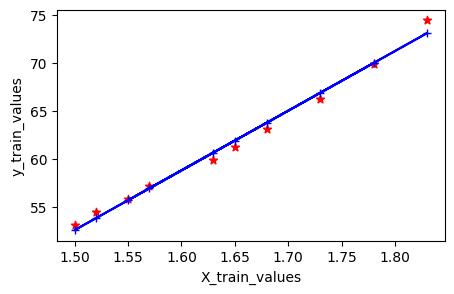

In [59]:
# data visualisation
plt.figure(figsize=(5,3))
plt.xlabel('X_train_values')
plt.ylabel('y_train_values')
plt.scatter(x=X_train,y=y_train,color='r',marker='*')
plt.plot(X_train,y_train_predictions,color='b',marker='+')
plt.show()


In [60]:
from sklearn.metrics import mean_squared_error,r2_score

In [61]:
s = training_data.index

Index([8, 2, 1, 14, 4, 7, 10, 12, 3, 6], dtype='int64')

In [62]:
s = 0
k = 0
for i in training_data.index:
    s = s + (training_data['y_train'][i] - training_data['y_train_pred'][i])**2
    k = k + (training_data['y_train'][i] - training_data['y_train'].mean())**2
print(1 - (s/k))

0.9899715082799867


In [63]:
r2_score(y_train,y_train_predictions)

0.9899715082799867

In [64]:
mean_squared_error(y_train,y_train_predictions)

0.4380427232301624

**Test_performance**

In [65]:
testing_data

,X_test,y_test
9,1.70,64.47
11,1.75,68.10
0,1.47,52.21
13,1.80,72.19
5,1.60,58.57


In [68]:
y_test_predictions = reg.predict(X_test)
y_test_predictions

array([65.03579687, 68.13650836, 50.77252401, 71.23721985, 58.83437389])

In [71]:
testing_data['y_test_pred'] = y_test_predictions
testing_data

,X_test,y_test,y_test_pred
9,1.70,64.47,65.035797
11,1.75,68.10,68.136508
0,1.47,52.21,50.772524
13,1.80,72.19,71.237220
5,1.60,58.57,58.834374


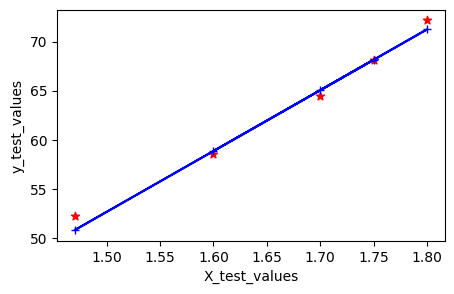

In [72]:
# data visualisation
plt.figure(figsize=(5,3))
plt.xlabel('X_test_values')
plt.ylabel('y_test_values')
plt.scatter(x=X_test,y=y_test,color='r',marker='*')
plt.plot(X_test,y_test_predictions,color='b',marker='+')
plt.show()


In [83]:
r2_score(y_test,y_test_predictions)*100 #accuracy


98.64632324720189

In [84]:
mean_squared_error(y_test,y_test_predictions)*100 # loss function

67.3095947501195

In [81]:
# MANUAL CODE FOR LOSS FUNCTION
s = 0
for i in testing_data.index:
  s = s + (testing_data['y_test'][i] - testing_data['y_test_pred'][i])**2
k = s / np.mean(testing_data['y_test'])
k

0.053328892335456284

------------------------------------------------------------------

In [85]:
##now im going to ask what i needed from the model

In [87]:
reg.predict([[2.0]])

array([83.64006581])